In [92]:
import pandas as pd

# Specify the file path of the CSV file
csv_file = '18100006.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)
columns_to_keep = ['REF_DATE', 'Products and product groups','VECTOR','VALUE']

# Drop all columns except the specified ones
df = df[columns_to_keep]
df.head()
pivot_df = df.pivot(index='REF_DATE', columns='Products and product groups', values='VALUE')
pivot_df.head()


Products and product groups,"Alcoholic beverages, tobacco products and recreational cannabis",All-items,All-items excluding food,All-items excluding food and energy,Clothing and footwear,Food,Health and personal care,"Household operations, furnishings and equipment","Recreation, education and reading",Shelter,Transportation
REF_DATE,,,,,,,,,,,
1992-01,79.8,83.1,83.3,84.2,94.1,82.0,85.3,87.7,78.9,87.6,73.6
1992-02,79.9,83.2,83.5,84.4,94.8,82.2,85.1,87.7,78.9,87.6,72.7
1992-03,80.2,83.6,83.7,84.8,94.8,82.9,85.5,87.6,79.0,87.5,73.6
1992-04,80.5,83.7,83.9,84.9,94.7,83.0,86.1,87.6,78.8,87.4,73.7
1992-05,80.9,83.9,84.1,85.2,95.5,82.8,86.2,87.7,78.9,87.6,74.0


In [93]:

# Calculate percent difference for each column
percent_diff = pivot_df.pct_change() * 100
percent_diff

Products and product groups,"Alcoholic beverages, tobacco products and recreational cannabis",All-items,All-items excluding food,All-items excluding food and energy,Clothing and footwear,Food,Health and personal care,"Household operations, furnishings and equipment","Recreation, education and reading",Shelter,Transportation
REF_DATE,,,,,,,,,,,
1992-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-02,0.125313,0.120337,0.240096,0.237530,0.743889,0.243902,-0.234467,0.000000,0.000000,0.000000,-1.222826
1992-03,0.375469,0.480769,0.239521,0.473934,0.000000,0.851582,0.470035,-0.114025,0.126743,-0.114155,1.237964
1992-04,0.374065,0.119617,0.238949,0.117925,-0.105485,0.120627,0.701754,0.000000,-0.253165,-0.114286,0.135870
1992-05,0.496894,0.238949,0.238379,0.353357,0.844773,-0.240964,0.116144,0.114155,0.126904,0.228833,0.407056
...,...,...,...,...,...,...,...,...,...,...,...
2023-01,0.701944,0.259235,0.066756,0.138122,-0.312175,0.951315,0.492958,-0.376790,0.000000,0.119190,-0.237248
2023-02,0.482574,0.129282,0.133422,0.344828,0.835073,0.443459,0.490540,0.832073,-0.240770,0.178571,-0.772889
2023-03,0.693703,0.258231,0.199867,0.343643,0.310559,0.441501,0.557880,-0.075019,0.482703,0.356506,-0.239664


In [104]:
percent_diff.to_csv('output.csv', index=True)


In [ ]:
renamed_df = percent_diff.rename(columns={
    'Products and product groups': 'Product_Groups',
    'Alcoholic beverages, tobacco products and recreational cannabis': 'Sins',
    'All-items': 'All',
    'Clothing and footwear': 'Clothing',
    'Food': 'Food',
    'Health and personal care': 'Health',
    'Household operations, furnishings and equipment': 'Household',
    'Recreation, education and reading': 'Education',
    'Shelter': 'Shelter',
    'Transportation': 'Transpo',
    'All-items excluding food':'No Food',
    'All-items excluding food and energy':'No Food/Energy'	
})
renamed_df 

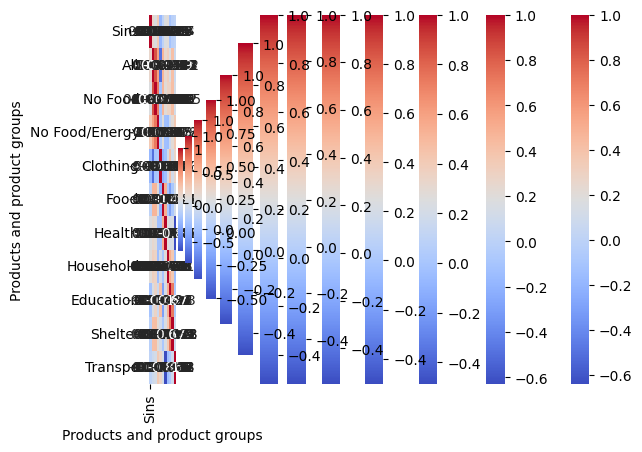

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
years=1
for x in range (years*12+1): 
    Last_12_months = renamed_df.iloc[x:12+x] #get the past 12 months data 
    returns_pct=Last_12_months
    corr = returns_pct.corr() # calculate the correlations between the returns of each pair of stocks
    sns.heatmap(corr,annot=True,cmap="coolwarm")   
    
    


In [100]:
    corr_df = pd.DataFrame(corr)
    titles = corr_df.columns.tolist()
    
    def truncate(f,relaxer=.99): 
        if (abs(f) < relaxer):
            return 0
        else:
            return 1
    relaxer=.9999
    truncated=corr.applymap(truncate)
    # we already know that every stock is perfectly correlated with itself, so the ones on the diagonal are not really useful information. Let's get rid of them.
    adj = truncated- np.identity(10)
    stocknet = nx.from_numpy_array(adj.to_numpy()) # initialize a new graph from our adjacency matrix

    while nx.is_connected(stocknet)==False:
        relaxer=relaxer-.0001
        truncated=corr.applymap(truncate)
        adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(10)
        stocknet = nx.from_numpy_array(adj.to_numpy()) # initialize a new graph from our adjacency matrix
    else:
        print("Connected Graph Found")
        #print(relaxer)

    IndexedStocknet=stocknet
    Indexedstock_layout = nx.spring_layout(IndexedStocknet,seed=10)
    stocknet = nx.relabel_nodes(stocknet, dict(enumerate(adj.columns))) # keep the stock tickers as the names of the nodes (instead of integers)
    stock_layout = nx.spring_layout(stocknet,seed=10) # fix our layout
    L = nx.laplacian_matrix(stocknet).todense()
    (u,v) = np.linalg.eig(L)
    u_sorted = np.sort(u)
    v_sorted = v[:, u.argsort()]
    colors = [ "lightcoral" for i in range(0,10) ]
    for i in range(0,10):
        if (v_sorted[i,1] < 0):
            colors[i] = "mediumpurple"


    eigen_cent = nx.eigenvector_centrality(IndexedStocknet)
    eigen_colors = [eigen_cent[i] for i in range(0,10)]
    fig, (ax1, ax2) = plt.subplots(ncols=2)

    # Draw the graphs in the subplots
    nx.draw(IndexedStocknet,Indexedstock_layout,node_color=eigen_colors,with_labels=True,ax=ax1)
    nx.draw(stocknet,stock_layout,node_color=colors,with_labels=True,ax=ax2)

    plt.show()
    
    df = pd.DataFrame(eigen_cent,index=[0])
    dfT= pd.DataFrame(titles)
    # print the resulting DataFrame
    mat1=df.T
    mat2=dfT
    Centrality_results = mat1.values.flatten().tolist()
    date_range_df.loc[date_range[x]] = Centrality_results

NameError: name 'np' is not defined

In [ ]:
for x in range (years*12+1): 
    Last_12_months = PastReturns_df.iloc[x:12+x] #get the past 12 months data 
    returns_pct=Last_12_months
    corr = returns_pct.corr() # calculate the correlations between the returns of each pair of stocks
    #sns.heatmap(corr,annot=True,cmap="coolwarm")   USE THIS FOR GRAPHICS
    corr_df = pd.DataFrame(corr)
    titles = corr_df.columns.tolist()
    
    def truncate(f,relaxer=.99): 
        if (abs(f) < relaxer):
            return 0
        else:
            return 1
    relaxer=.9999
    truncated=corr.applymap(truncate)
    # we already know that every stock is perfectly correlated with itself, so the ones on the diagonal are not really useful information. Let's get rid of them.
    adj = truncated- np.identity(10)
    stocknet = nx.from_numpy_array(adj.to_numpy()) # initialize a new graph from our adjacency matrix

    while nx.is_connected(stocknet)==False:
        relaxer=relaxer-.0001
        truncated=corr.applymap(truncate)
        adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(10)
        stocknet = nx.from_numpy_array(adj.to_numpy()) # initialize a new graph from our adjacency matrix
    else:
        print("Connected Graph Found")
        #print(relaxer)

    IndexedStocknet=stocknet
    Indexedstock_layout = nx.spring_layout(IndexedStocknet,seed=10)
    stocknet = nx.relabel_nodes(stocknet, dict(enumerate(adj.columns))) # keep the stock tickers as the names of the nodes (instead of integers)
    stock_layout = nx.spring_layout(stocknet,seed=10) # fix our layout
    L = nx.laplacian_matrix(stocknet).todense()
    (u,v) = np.linalg.eig(L)
    u_sorted = np.sort(u)
    v_sorted = v[:, u.argsort()]
    colors = [ "lightcoral" for i in range(0,10) ]
    for i in range(0,10):
        if (v_sorted[i,1] < 0):
            colors[i] = "mediumpurple"


    eigen_cent = nx.eigenvector_centrality(IndexedStocknet)
    eigen_colors = [eigen_cent[i] for i in range(0,10)]
    fig, (ax1, ax2) = plt.subplots(ncols=2)

    # Draw the graphs in the subplots
    nx.draw(IndexedStocknet,Indexedstock_layout,node_color=eigen_colors,with_labels=True,ax=ax1)
    nx.draw(stocknet,stock_layout,node_color=colors,with_labels=True,ax=ax2)

    plt.show()
    
    df = pd.DataFrame(eigen_cent,index=[0])
    dfT= pd.DataFrame(titles)
    # print the resulting DataFrame
    mat1=df.T
    mat2=dfT
    Centrality_results = mat1.values.flatten().tolist()
    date_range_df.loc[date_range[x]] = Centrality_results